# <font color='#3e9dbf'>Import Library and Dataset</font>

In [374]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

In [375]:
url = "../iris.data"
columns_name = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
dataset = pd.read_csv(url, names=columns_name, sep=',', na_values='?', skipinitialspace =True)

# dataset.head(len(dataset))

# <font color='#3e9dbf'>Function</font>

## <font color='#e89c9a'><ul><li>Plot Decision Tree</li></ul></font>

In [376]:
def plot_decision_tree(model, size):
  # กำหนดสีของแต่ละคลาส
  class_colors = {
    'Iris-setosa': '#e9c7c6',
    'Iris-versicolor': '#9fc3d0',
    'Iris-virginica': '#c6e9c7'
  }

  # สร้าง colormap จากสีของแต่ละคลาส
  cmap = mcolors.ListedColormap([class_colors[c] for c in model.classes_])

  plt.figure(figsize=size)
  plot_tree(
    model,
    feature_names=columns_name[:-1],
    class_names=model.classes_,
    filled=True,
    rounded=True,
    impurity=False,
    proportion=False,  # แสดงจำนวน samples เป็นค่าจริง
    fontsize=18
  )

  # ปรับสีของโหนด
  ax = plt.gca()
  for i, t in enumerate(ax.get_children()):
    if isinstance(t, plt.Text):
      for cls, color in class_colors.items():
        if cls in t.get_text():
          t.set_bbox(dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

  plt.show()

## <font color='#e89c9a'><ul><li>Confusion Matrix</li></ul></font>

In [377]:
def plot_confusion_matrix(cm, classes, title, type):
  cmap = plt.cm.Blues if type == 'T' else plt.cm.Oranges

  plt.figure(figsize=(10, 10))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, size=16, pad=22)
  plt.colorbar(aspect=4)
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, size=18)
  plt.yticks(tick_marks, classes, size=18)

  thresh = cm.max() / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), fontsize=30, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.gca().set_facecolor('none')
  plt.grid(None)
  plt.tight_layout()
  plt.ylabel('Actual', size=16)
  plt.xlabel('Predicted', size=16, labelpad=20)

  plt.show()

# <font color='#3e9dbf'>Spilt Train and Test Data</font>

In [378]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color='#3e9dbf'>Default parameter</font>

In [379]:
title = 'Default parameters'

## <font color='#e89c9a'><ul><li>Decision Tree Classifier</li></ul></font>

In [380]:
tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

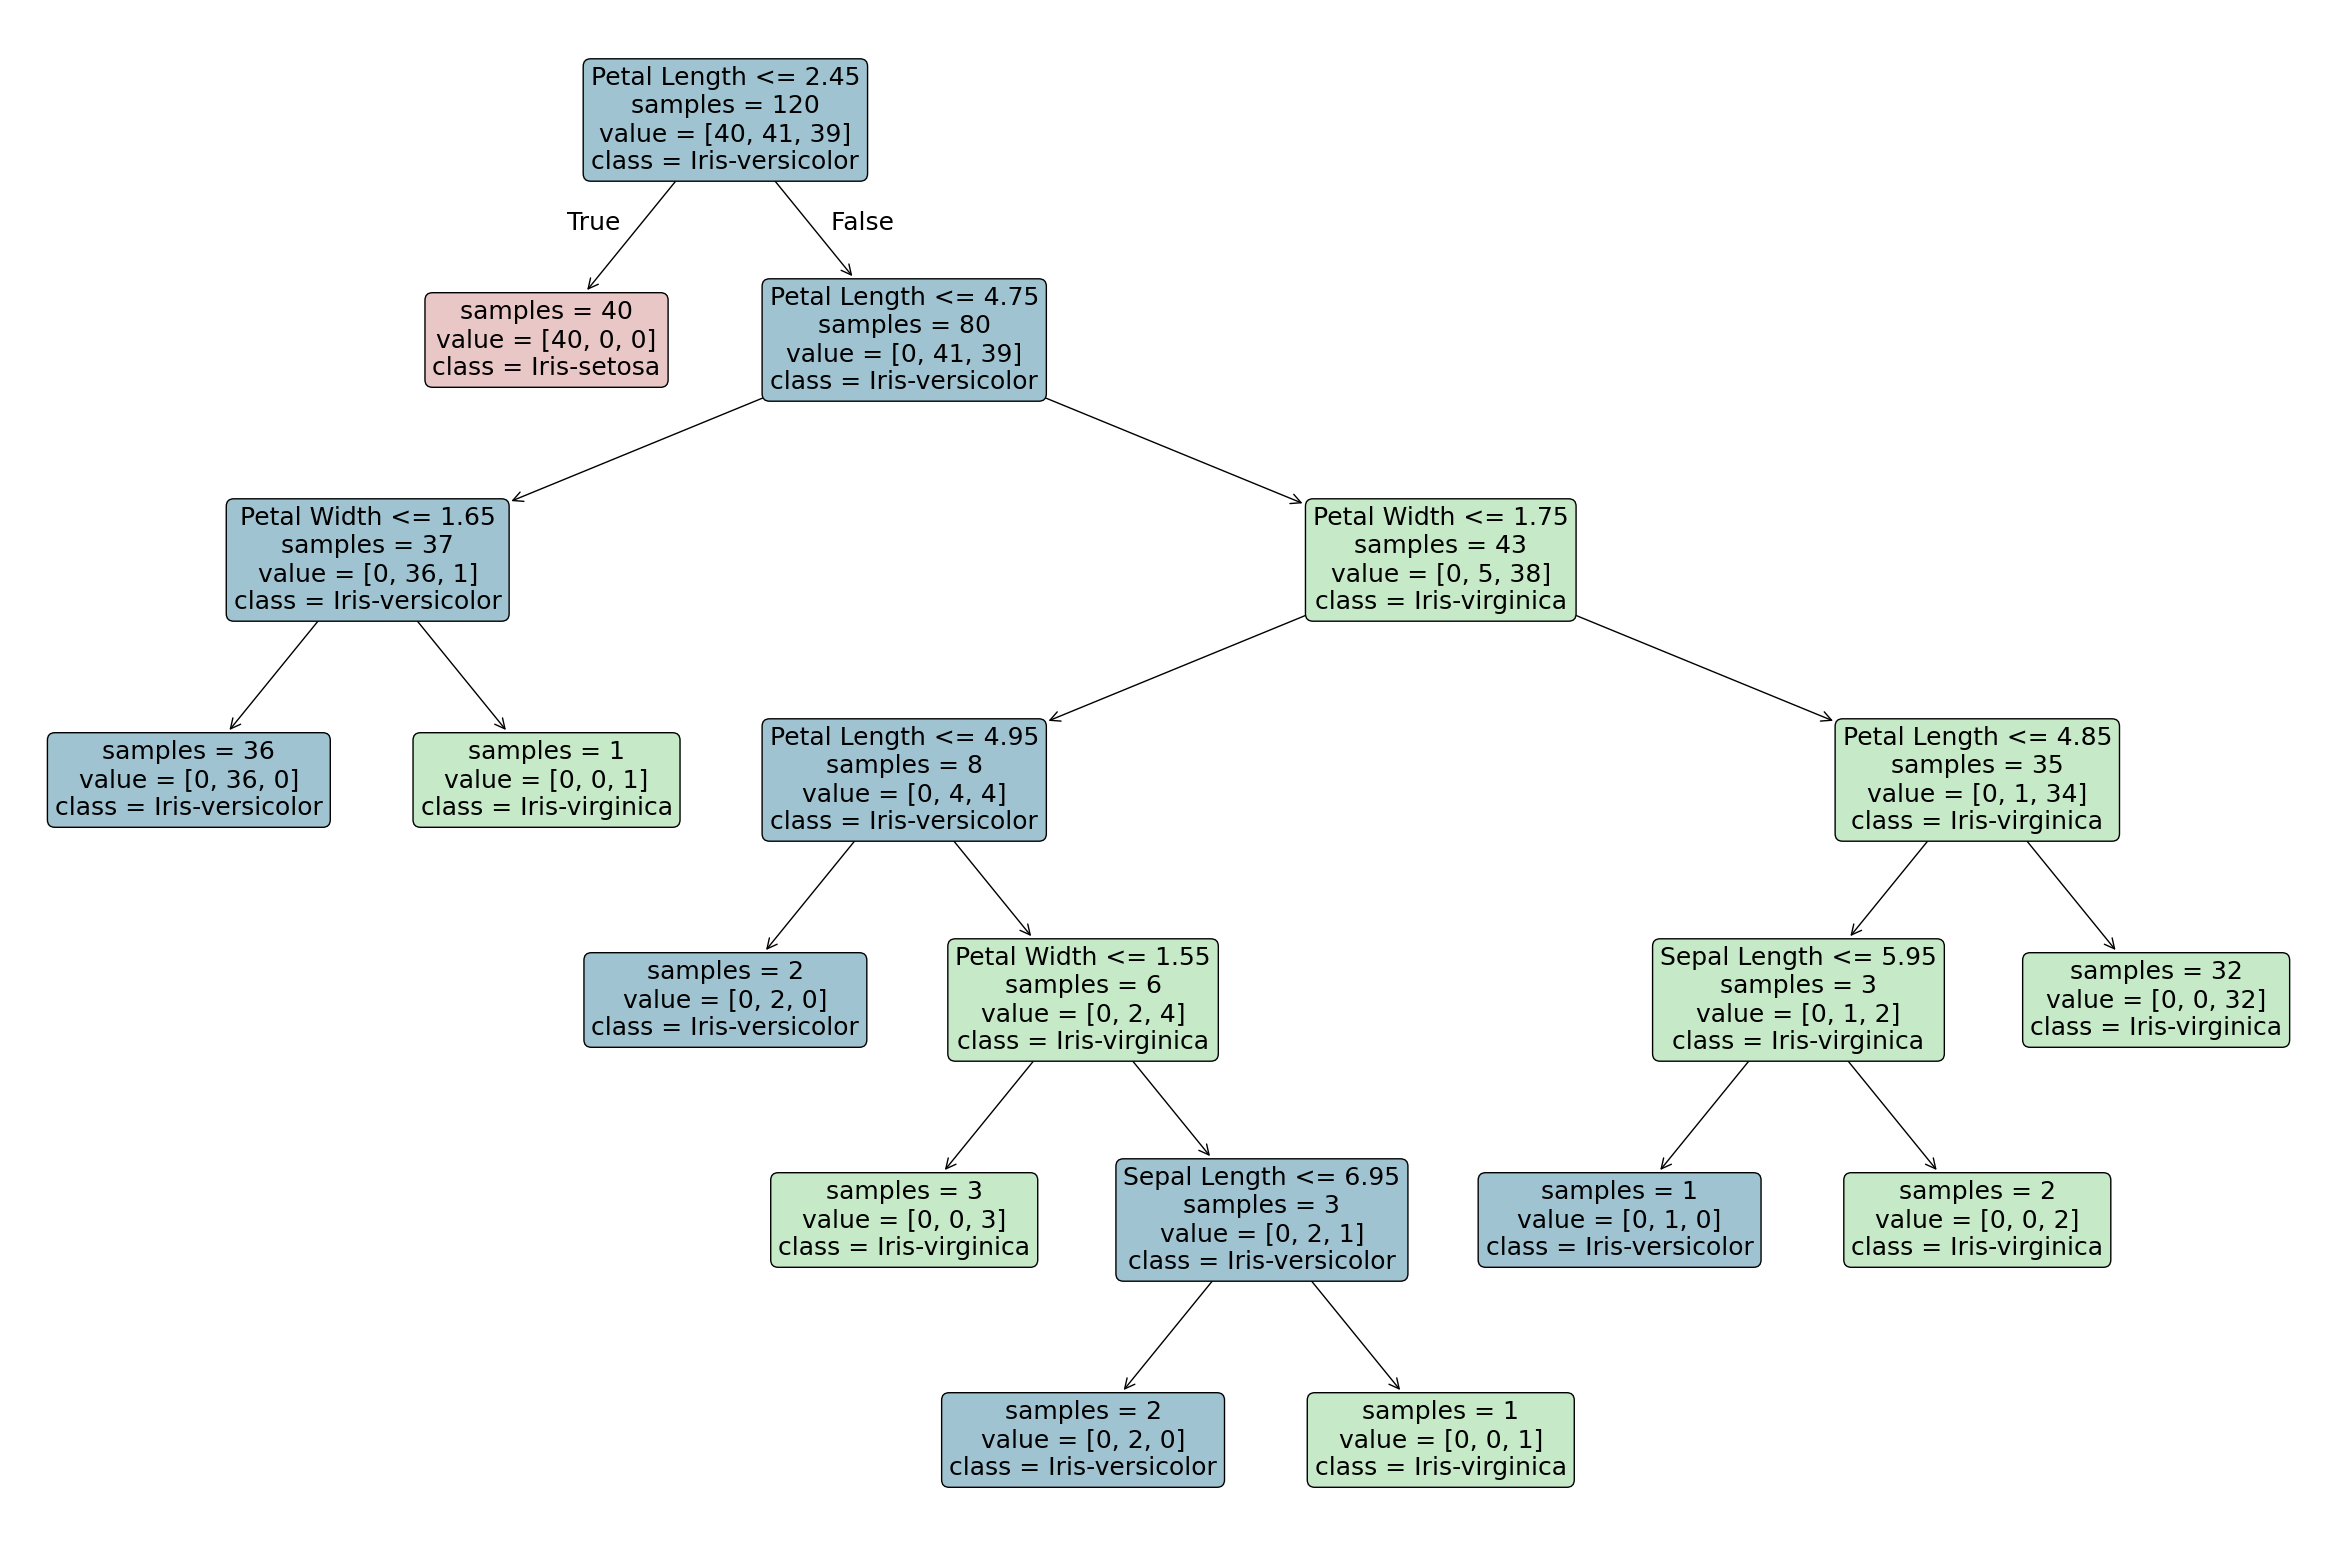

In [381]:
plot_decision_tree(tree_model, size=(30, 20))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

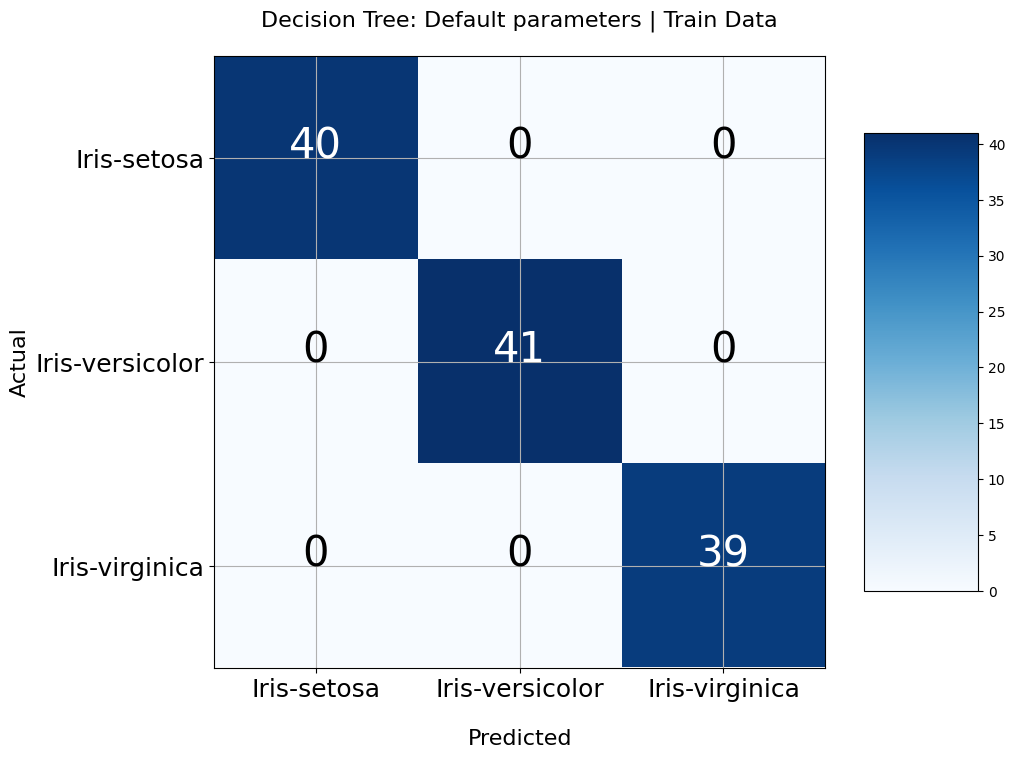

Accuracy: 100.00%


In [382]:
tree_train_predict = tree_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, tree_train_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Train Data", type='T')
print(f"Accuracy: {accuracy_score(y_train, tree_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

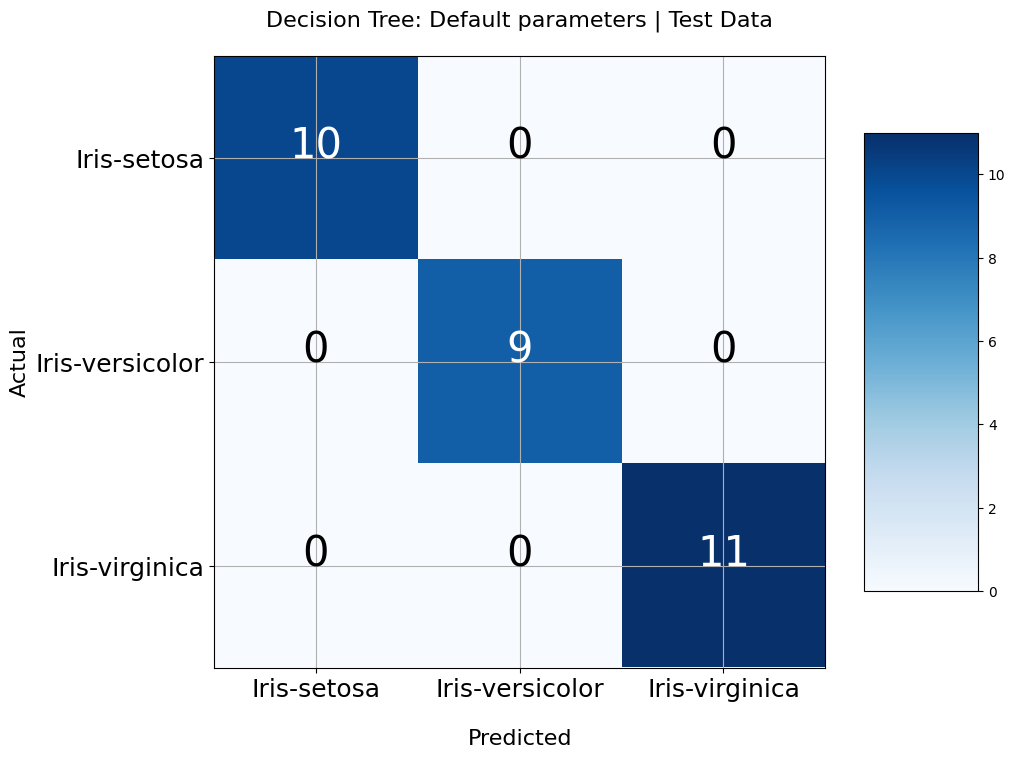

Accuracy: 100.00%


In [383]:
tree_test_predict = tree_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, tree_test_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Test Data", type='T')
print(f"Accuracy: {accuracy_score(y_test, tree_test_predict) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Random Forest Classifier</li></ul></font>

In [384]:
forest_model = RandomForestClassifier().fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

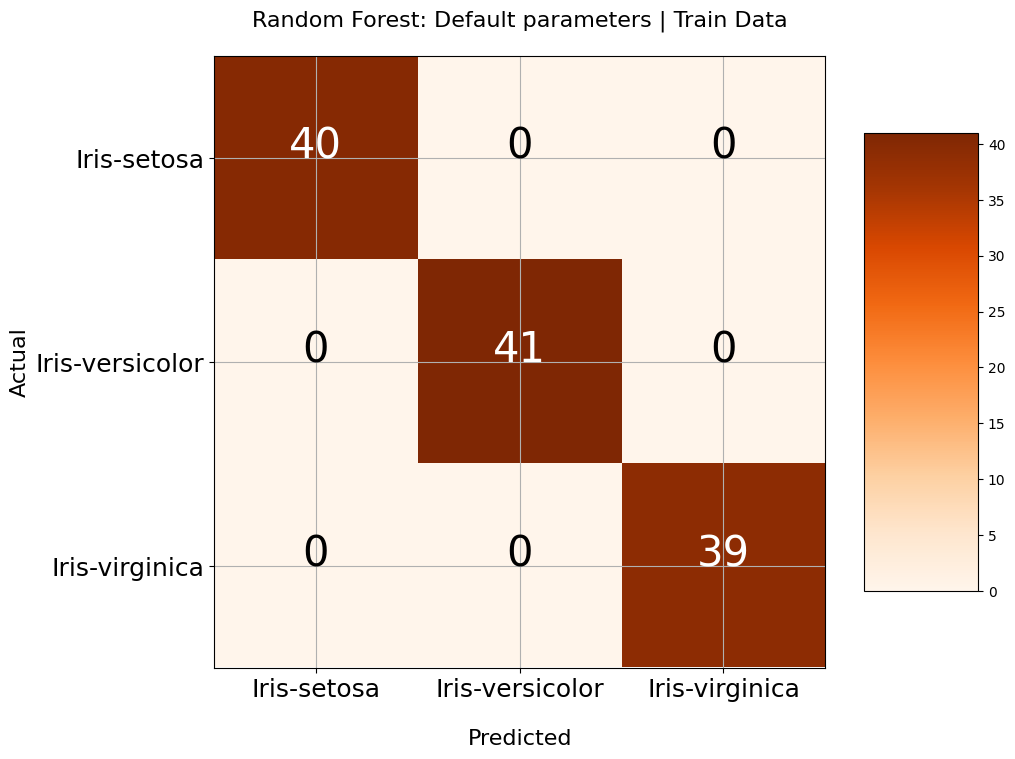

Accuracy: 100.00%


In [385]:
forest_train_predict = forest_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, forest_train_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Train Data", type='F')
print(f"Accuracy: {accuracy_score(y_train, forest_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

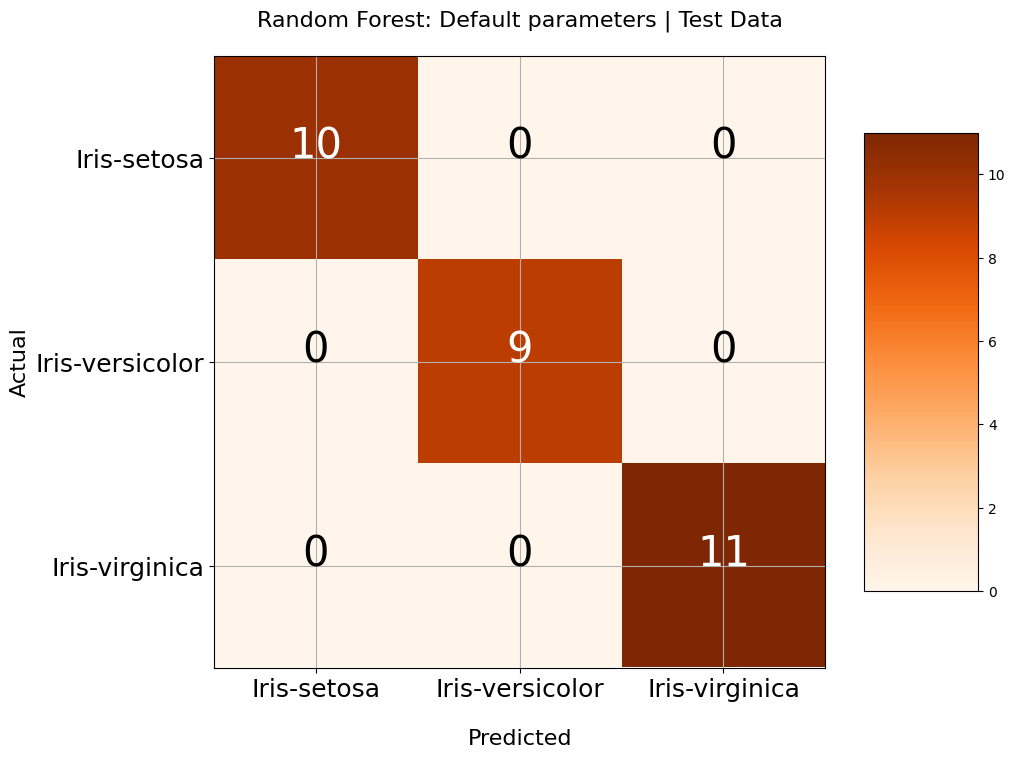

Accuracy: 100.00%


In [386]:
forest_test_predict = forest_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, forest_test_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Test Data", type='F')
print(f"Accuracy: {accuracy_score(y_test, forest_test_predict) * 100:.2f}%")

# <font color='#3e9dbf'>max_leaf_nodes = 3</font>

In [387]:
title = 'max_leaf_nodes = 3'

## <font color='#e89c9a'><ul><li>Decision Tree Classifier</li></ul></font>

In [388]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42).fit(X_train, y_train)

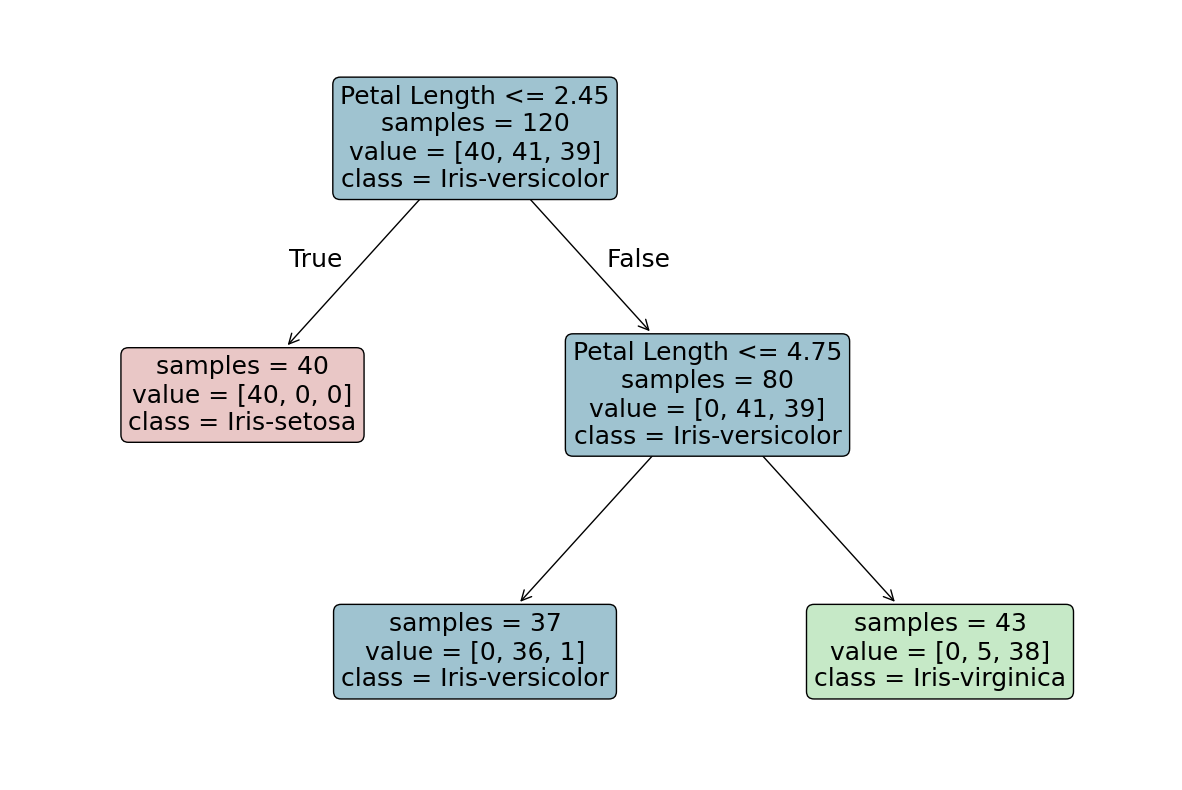

In [389]:
plot_decision_tree(tree_model, size=(15, 10))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

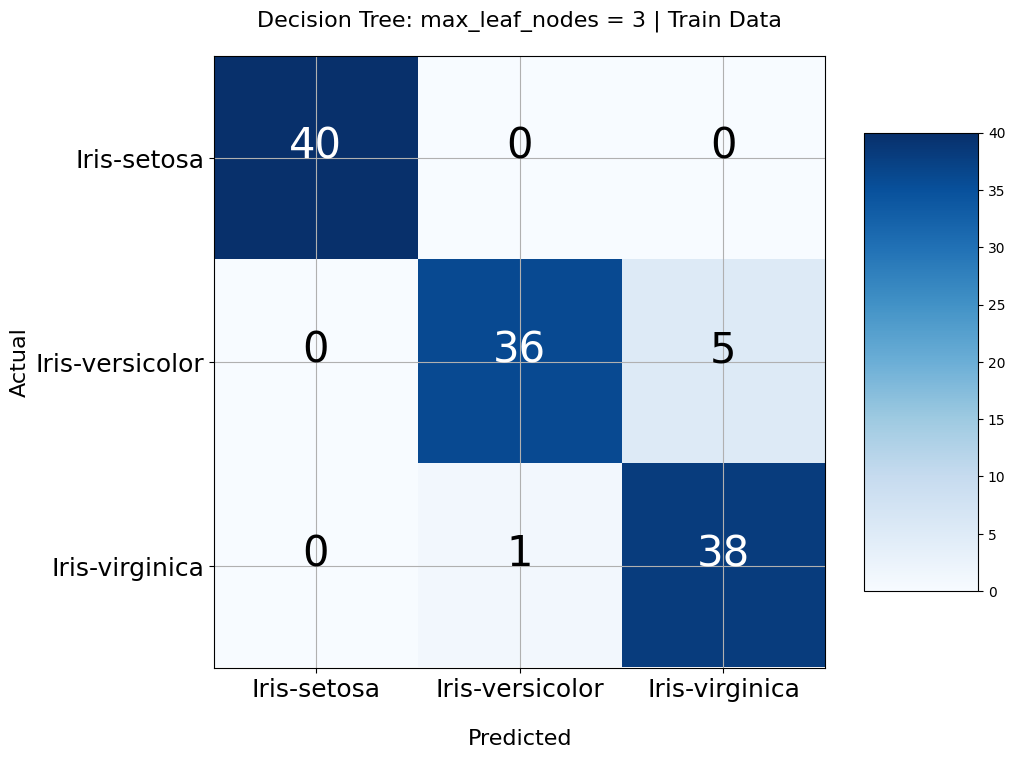

Accuracy: 95.00%


In [390]:
tree_train_predict = tree_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, tree_train_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Train Data", type='T')
print(f"Accuracy: {accuracy_score(y_train, tree_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

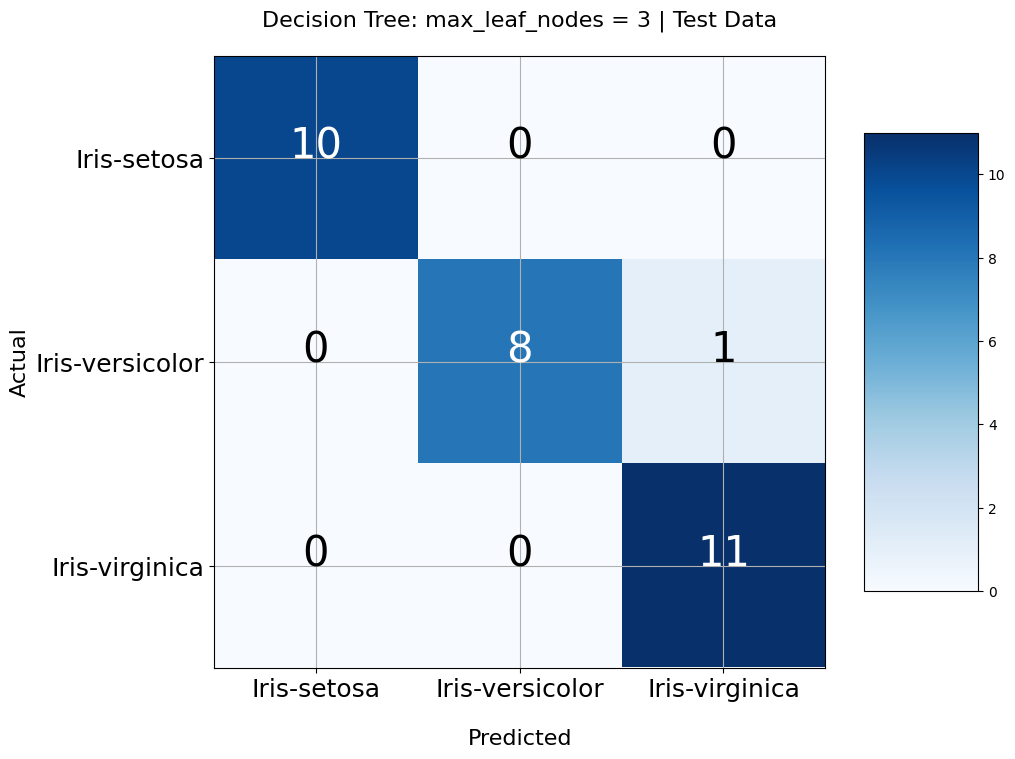

Accuracy: 96.67%


In [391]:
tree_test_predict = tree_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, tree_test_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Test Data", type='T')
print(f"Accuracy: {accuracy_score(y_test, tree_test_predict) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Random Forest Classifier</li></ul></font>

In [392]:
forest_model = RandomForestClassifier(max_leaf_nodes=3, random_state=42).fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

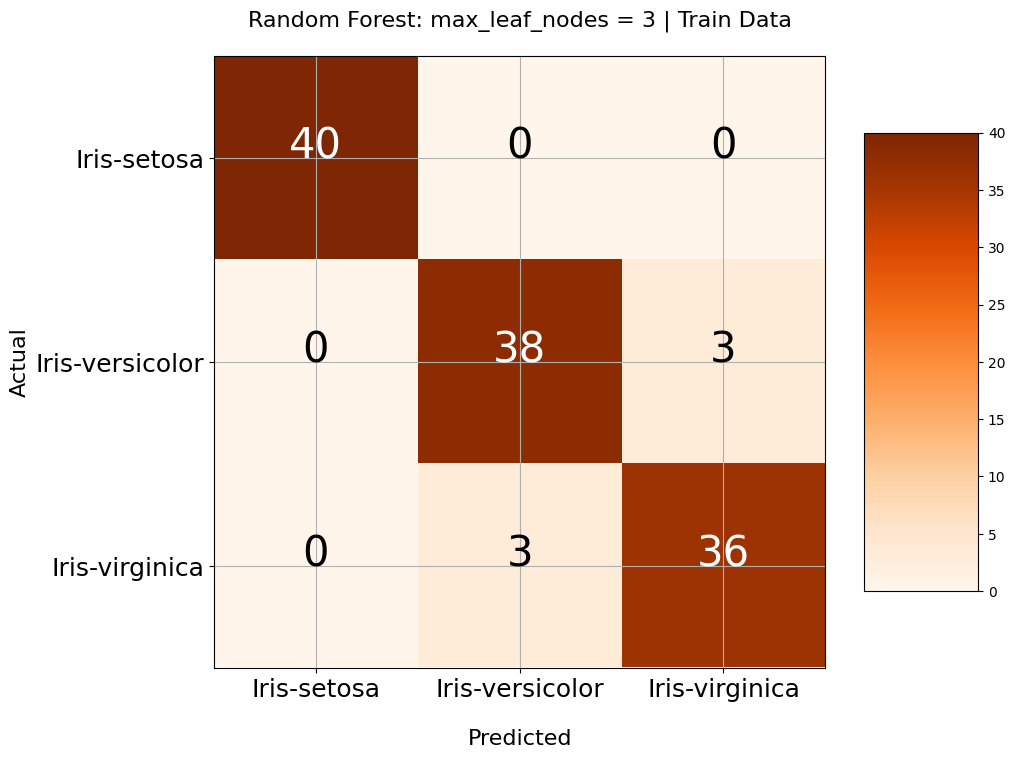

Accuracy: 95.00%


In [393]:
forest_train_predict = forest_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, forest_train_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Train Data", type='F')
print(f"Accuracy: {accuracy_score(y_train, forest_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

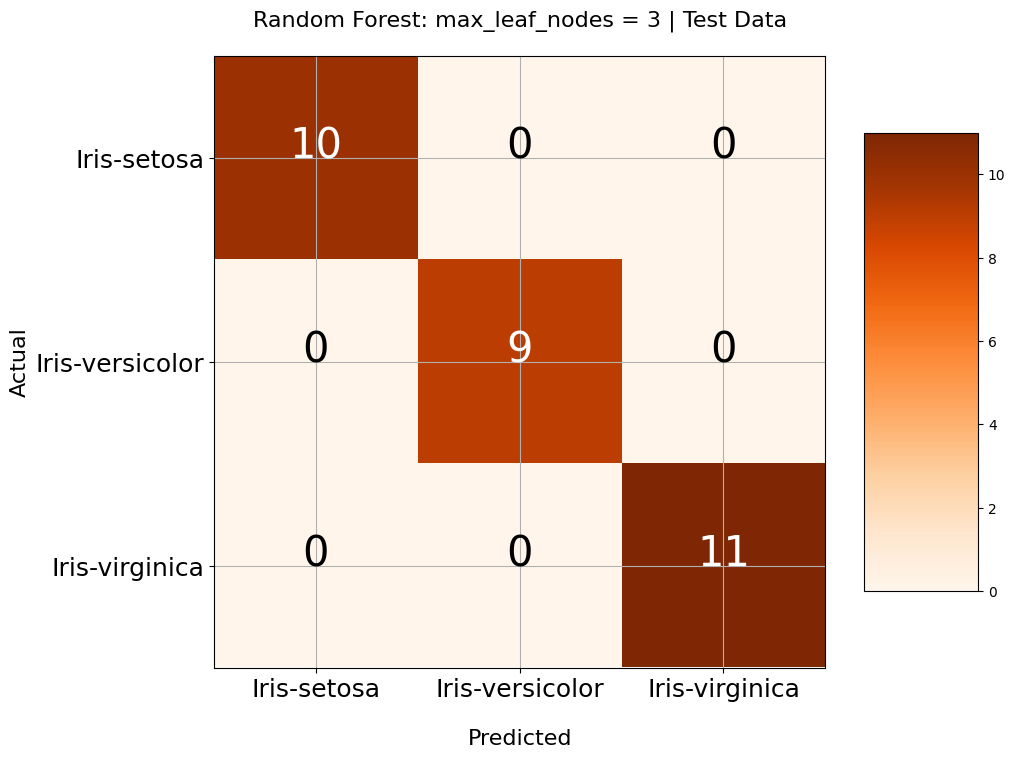

Accuracy: 100.00%


In [394]:
forest_test_predict = forest_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, forest_test_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Test Data", type='F')
print(f"Accuracy: {accuracy_score(y_test, forest_test_predict) * 100:.2f}%")

# <font color='#3e9dbf'>max_depth = 3</font>

In [395]:
title = 'max_depth = 3'

## <font color='#e89c9a'><ul><li>Decision Tree Classifier</li></ul></font>

In [396]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

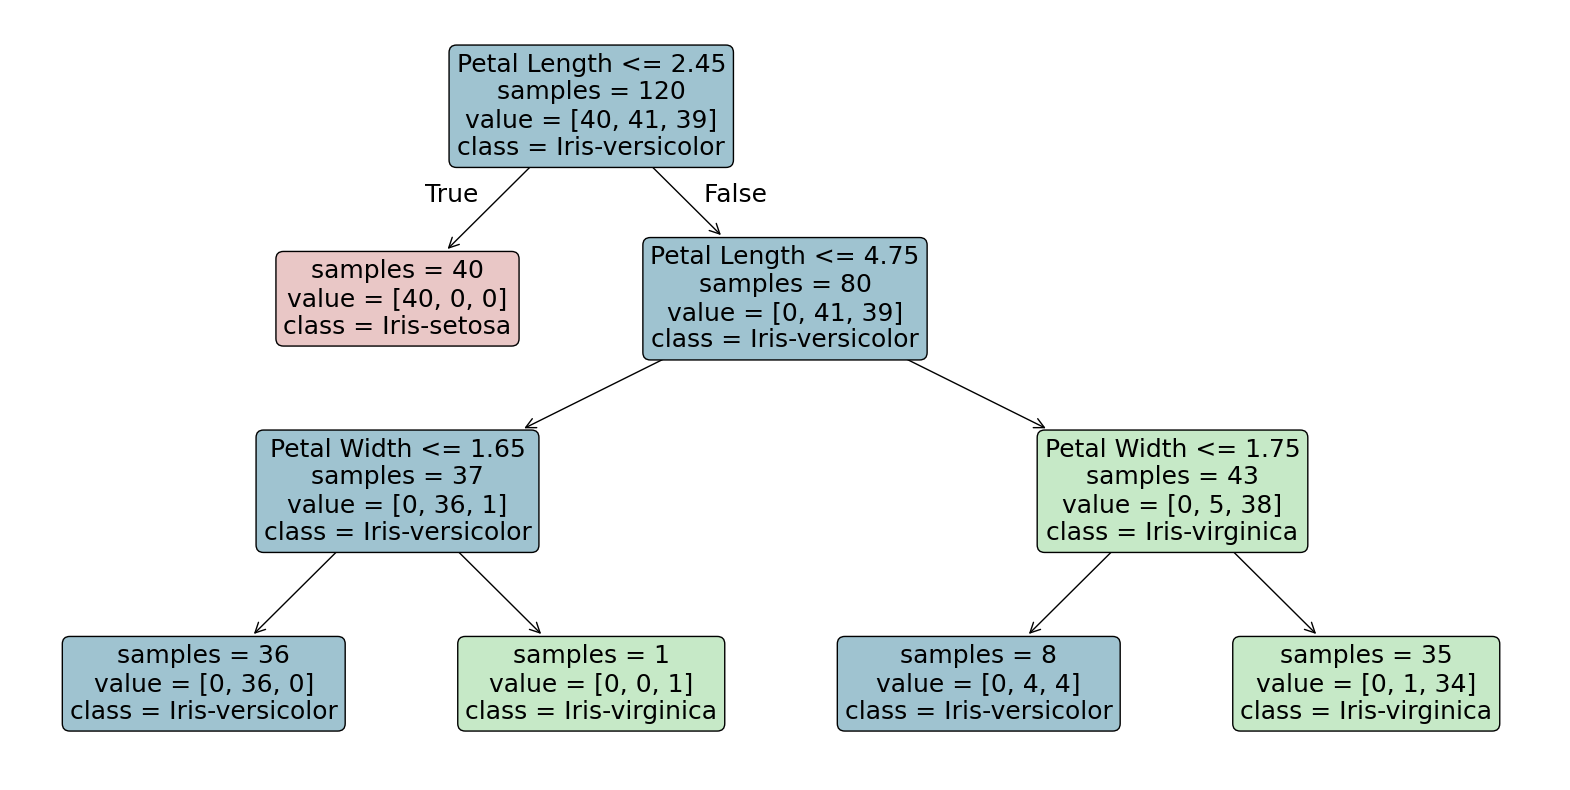

In [397]:
plot_decision_tree(tree_model, size=(20, 10))

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

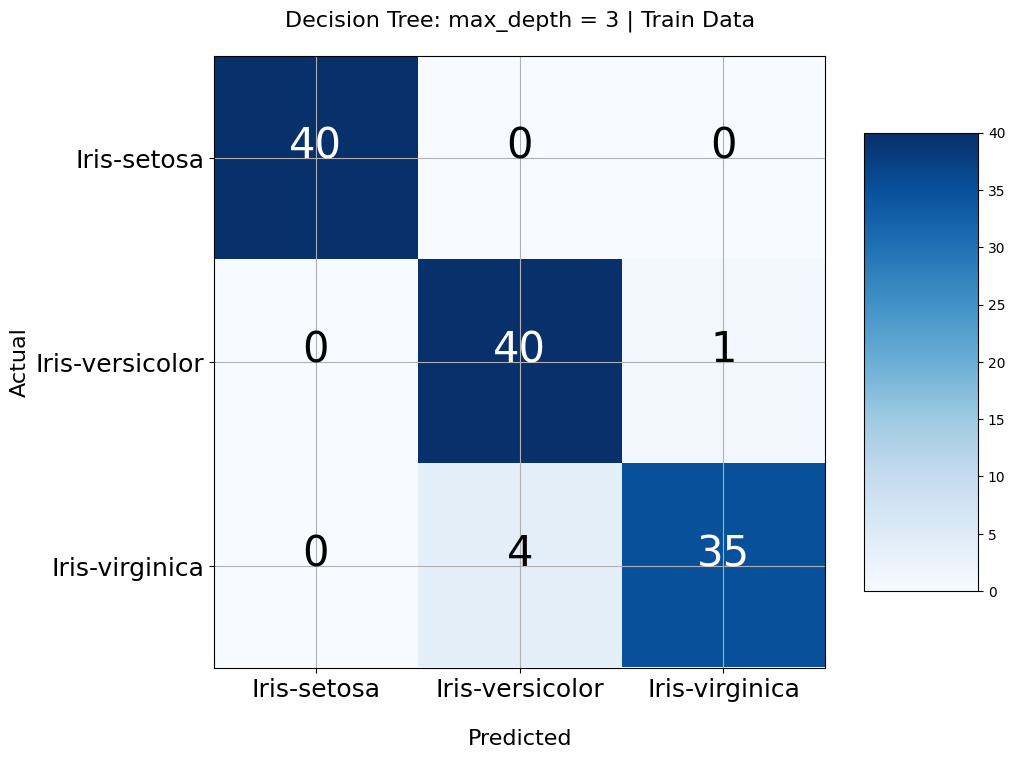

Accuracy: 95.83%


In [398]:
tree_train_predict = tree_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, tree_train_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Train Data", type='T')
print(f"Accuracy: {accuracy_score(y_train, tree_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

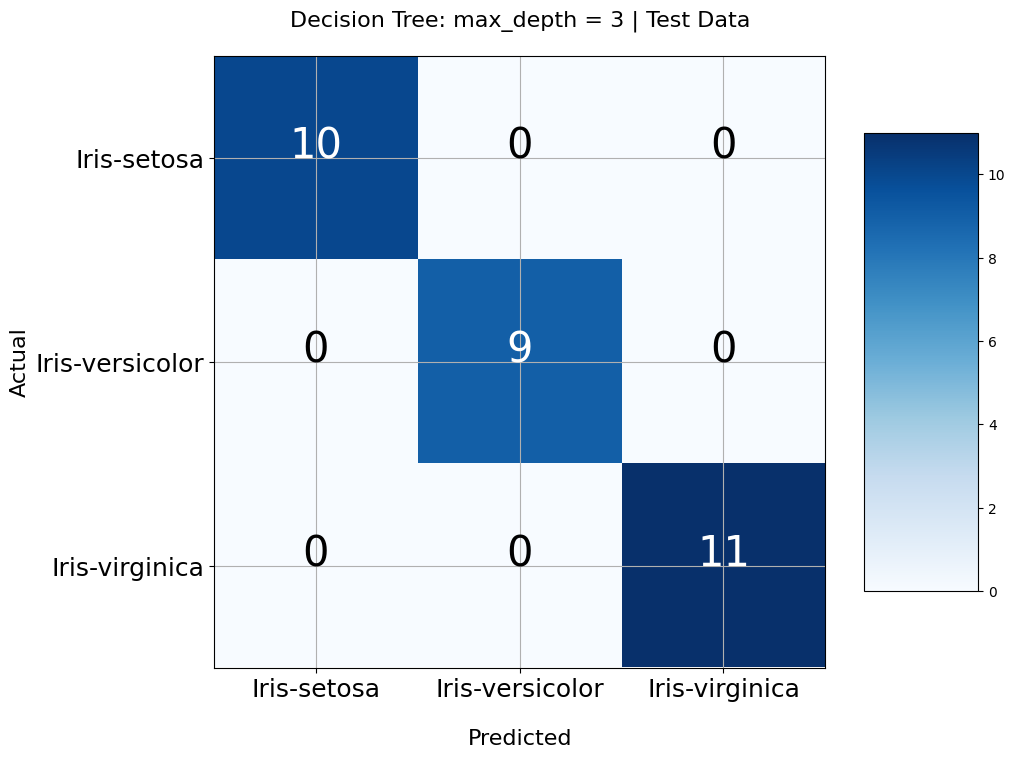

Accuracy: 100.00%


In [399]:
tree_test_predict = tree_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, tree_test_predict), classes=tree_model.classes_, title=f"Decision Tree: {title} | Test Data", type='T')
print(f"Accuracy: {accuracy_score(y_test, tree_test_predict) * 100:.2f}%")

## <font color='#e89c9a'><ul><li>Random Forest Classifier</li></ul></font>

In [400]:
forest_model = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Train</li></ul></font>

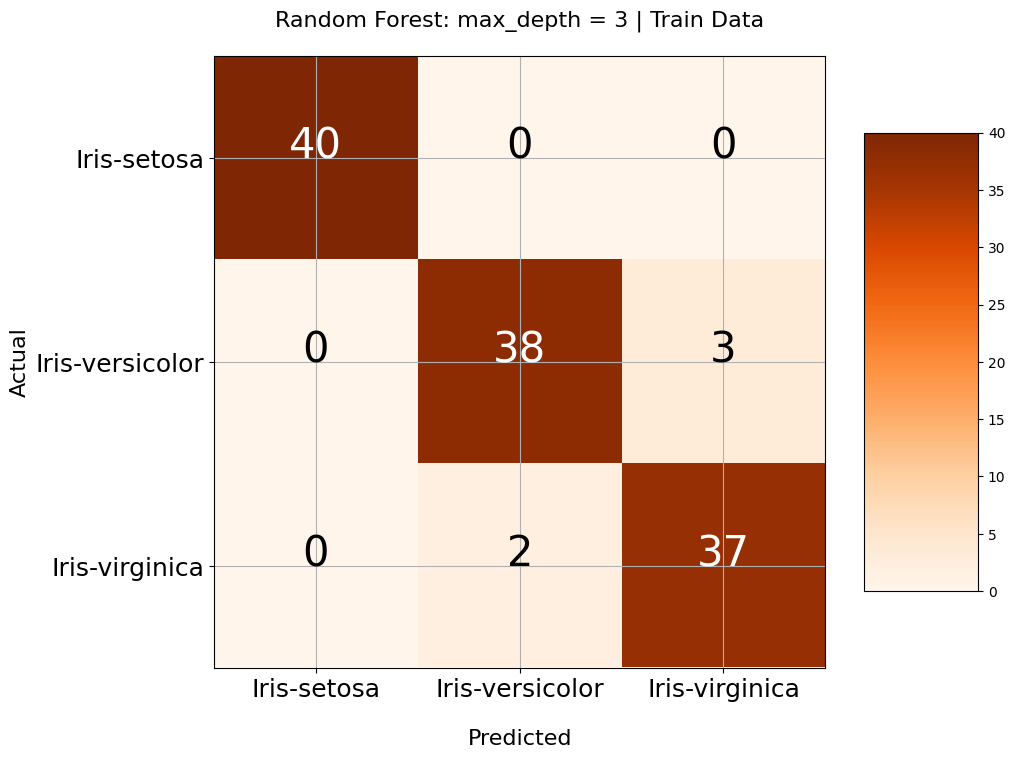

Accuracy: 95.83%


In [401]:
forest_train_predict = forest_model.predict(X_train)

plot_confusion_matrix(confusion_matrix(y_train, forest_train_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Train Data", type='F')
print(f"Accuracy: {accuracy_score(y_train, forest_train_predict) * 100:.2f}%")

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Test</li></ul></font>

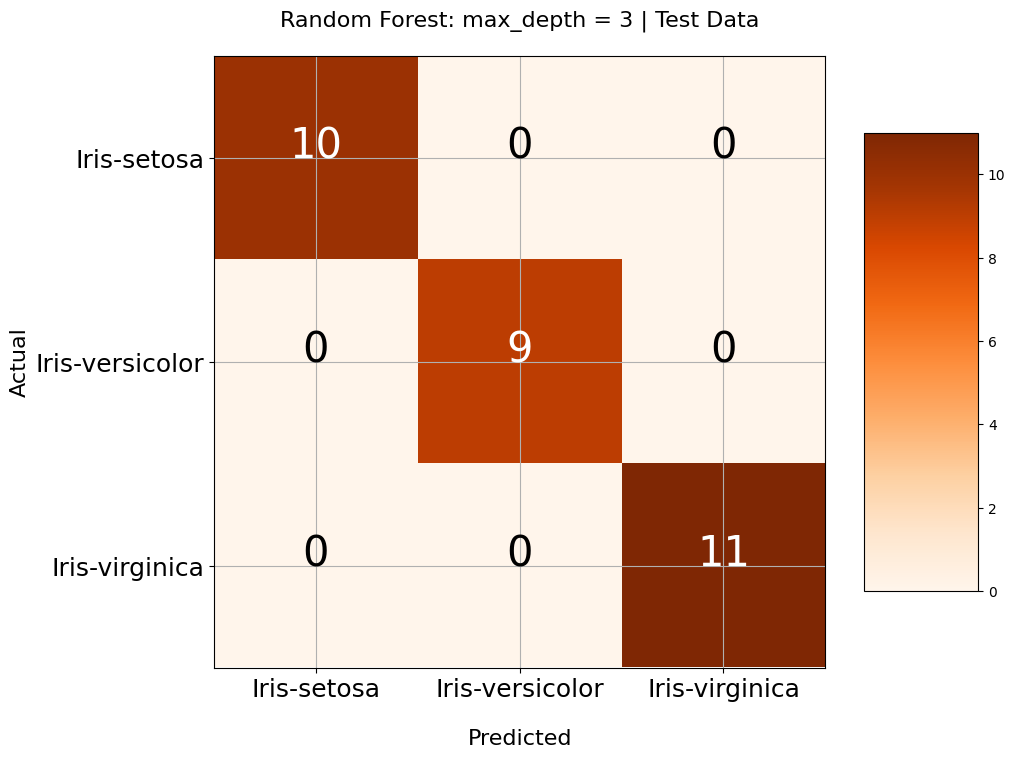

Accuracy: 100.00%


In [402]:
forest_test_predict = forest_model.predict(X_test)

plot_confusion_matrix(confusion_matrix(y_test, forest_test_predict), classes=forest_model.classes_, title=f"Random Forest: {title} | Test Data", type='F')
print(f"Accuracy: {accuracy_score(y_test, forest_test_predict) * 100:.2f}%")